#**Early Chronic Kidney Disease Detection**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv('/content/kidney_disease.csv')


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [4]:
# to see all features or columns
pd.set_option('display.max_columns',None)

In [5]:
dataset.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [6]:
# to see rows
# pd.set_option('display.max_rows',20)
dataset.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [7]:
dataset.columns


Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [8]:
dataset.isnull().sum()

,0
id,0
age,9
bp,12
sg,47
al,46
su,49
rbc,152
pc,65
pcc,4
ba,4


In [9]:
pd.set_option('display.max_rows',30)

In [10]:
((dataset.isnull().sum()/dataset.shape[0])*100)

,0
id,0.00
age,2.25
bp,3.00
sg,11.75
al,11.50
su,12.25
rbc,38.00
pc,16.25
pcc,1.00
ba,1.00


In [11]:
dataset['classification'].value_counts()

,count
classification,
ckd,248
notckd,150
ckd\t,2


In [12]:
cols=['wc','rc']

# convert each column using pd.to_numeric from object to numeric data type
for col in cols:
  dataset[col]=pd.to_numeric(dataset[col],errors='coerce')

In [13]:

dataset['classification'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [14]:
print(dataset['classification'].unique())

['ckd' 'ckd\t' 'notckd']


In [15]:
dataset['classification']=dataset['classification'].str.strip()

In [16]:
print(dataset['classification'].unique())

['ckd' 'notckd']


In [17]:
dataset.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,wc,rc
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,294.000000,269.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,8406.122449,4.707435
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,2944.474190,1.025323
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,2200.000000,2.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,6500.000000,3.900000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,8000.000000,4.800000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,9800.000000,5.400000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,26400.000000,8.000000


Encoding of target

ckd----->0
notckd ----> 1

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset['classification']=le.fit_transform(dataset['classification'])
dataset['classification']

,classification
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,1


Train_test_split

In [19]:
x=dataset.drop(columns='classification')
y=dataset['classification']
x

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800.0,5.2,yes,yes,no,good,no,no
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000.0,NaN,no,no,no,good,no,no
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500.0,NaN,no,yes,no,poor,no,yes
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700.0,3.9,yes,no,no,poor,yes,yes
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300.0,4.6,no,no,no,good,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700.0,4.9,no,no,no,good,no,no
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800.0,6.2,no,no,no,good,no,no
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600.0,5.4,no,no,no,good,no,no
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200.0,5.9,no,no,no,good,no,no


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,stratify=y,random_state=42)

**import libraries**

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [23]:
dataset.head(1)
dataset.dtypes

,0
id,int64
age,float64
bp,float64
sg,float64
al,float64
su,float64
rbc,object
pc,object
pcc,object
ba,object


In [24]:
dataset.head()

,id,age,bp,sg,al,...,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,...,no,good,no,no,0
1,1,7.0,50.0,1.020,4.0,...,no,good,no,no,0
2,2,62.0,80.0,1.010,2.0,...,no,poor,no,yes,0
3,3,48.0,70.0,1.005,4.0,...,no,poor,yes,yes,0
4,4,51.0,80.0,1.010,2.0,...,no,good,no,no,0


In [25]:
dataset.dtypes

,0
id,int64
age,float64
bp,float64
sg,float64
al,float64
su,float64
rbc,object
pc,object
pcc,object
ba,object


In [26]:
numerical_features=x.select_dtypes(include=['int64','float64']).drop(columns='id',errors='ignore').columns.tolist()
numerical_features

['age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'wc',
 'rc']

In [27]:
categorical_features=x.select_dtypes(include='object').columns.tolist()
categorical_features

['rbc', 'pc', 'pcc', 'ba', 'pcv', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

**Preprocessing**

In [28]:
numeric_transformer=Pipeline([
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler())]
)

categoriacl_transformer=Pipeline([
  ('imputer',SimpleImputer(strategy='most_frequent')),
  ('encoder',OneHotEncoder(handle_unknown='ignore'))]
)

# now combine both preprocessing of numrical nd categorical into one using column transformer

preprocessor=ColumnTransformer(
    [
        ('nums',numeric_transformer,numerical_features),
        ('cat',categoriacl_transformer,categorical_features)
    ],
    remainder='passthrough'
)


# now create final pipeline
pipeline=Pipeline([
    ('preprocessor',preprocessor),
    ('model',RandomForestClassifier(n_estimators=100,max_depth=5,random_state=0))]
)

**Model training and evaluation**

In [29]:
pipeline.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('nums',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bp', 'sg', 'al',
                                                   'su', 'bgr', 'bu', 'sc',
                                                   'sod', 'pot', 'hemo', 'wc',
                                                   'rc']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['rbc', 'pc', 'pcc', 'ba',
                                                   'pcv', 'htn', 'dm', 'cad',
                                                   'appet', 'pe', 'ane'])])),
                ('model', RandomForestClassifier(max_depth=5, random_state=0))])

In [30]:
pipeline.score(x_train,y_train)*100,pipeline.score(x_test,y_test)*100

(100.0, 100.0)

In [31]:
# duplicates = dataset.duplicated().sum()
# print("Duplicates:", duplicates)


In [32]:
# from sklearn.metrics import confusion_matrix,classification_report
# y_pred=pipeline.predict(x_test)

In [33]:
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [34]:
# comparison_df = pd.DataFrame({
#     'Actual': y_test,
#     'Predicted': y_pred,
# })

# Early Chronic Kidney Disease Prediction

In [35]:
# import necessary libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df=pd.read_csv('/content/kidney_disease.csv')

In [37]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [39]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [40]:
df.isnull().sum()/df.shape[0]*100

,0
id,0.00
age,2.25
bp,3.00
sg,11.75
al,11.50
su,12.25
rbc,38.00
pc,16.25
pcc,1.00
ba,1.00


In [41]:
# data cleaning
df['classification'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [42]:
df['classification']=df['classification'].str.strip()

In [43]:
df['classification'].unique()

array(['ckd', 'notckd'], dtype=object)

In [44]:
df.head(5)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [45]:
print(df.dtypes)

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object


In [46]:
# as pcv,wc,rc actually numeric values but datatype given as object
cols=['pcv','wc','rc']

for col in cols:
    df[col]=pd.to_numeric(df[col],errors='coerce')

In [47]:
df.dtypes

,0
id,int64
age,float64
bp,float64
sg,float64
al,float64
su,float64
rbc,object
pc,object
pcc,object
ba,object


In [48]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [49]:
# now split input features and targest/output
x=df.drop(columns='classification')
y=df['classification']

In [50]:
x

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,no,no,no,good,no,no
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,no,no,no,good,no,no
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,no,no,no,good,no,no
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,no,no,no,good,no,no


In [51]:
y

,classification
0,ckd
1,ckd
2,ckd
3,ckd
4,ckd
...,...
395,notckd
396,notckd
397,notckd
398,notckd


In [52]:
y.value_counts()

,count
classification,
ckd,250
notckd,150


In [53]:
# now splitting the data into train and test

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,stratify=y,random_state=42)

In [54]:
# separte numerical and categorical features(columns) to preprocess accordingly

cat_features=x.select_dtypes(include='object').columns.tolist()
cat_features

['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

In [55]:
df.head(1)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd


In [56]:
num_features=x.select_dtypes(include=['number']).drop(columns='id',errors="ignore").columns.tolist()    # or include=['int64','float64']
num_features

['age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc']

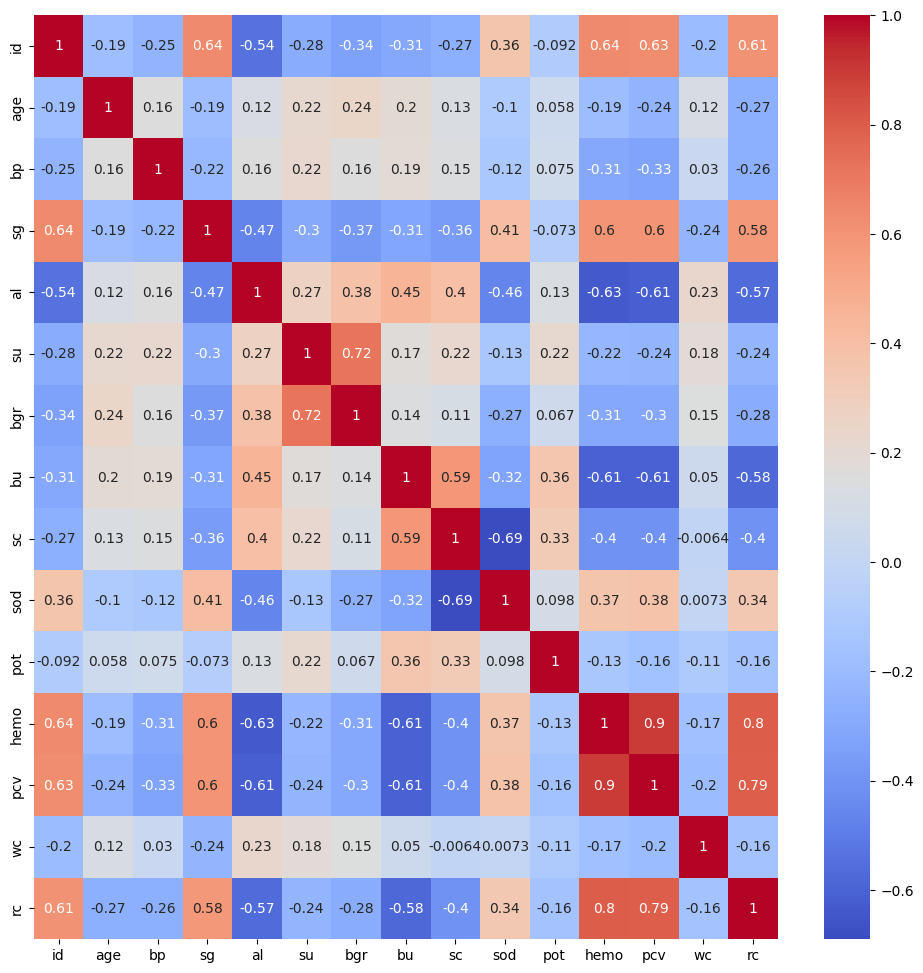

In [57]:
numeric_data=df.select_dtypes(include='number')
plt.figure(figsize=(12,12))
sns.heatmap(numeric_data.corr(),annot=True,cmap='coolwarm')
plt.show()

In [58]:
# now model training and evaluation

num_transformer=Pipeline(
  [('impute',SimpleImputer(strategy='mean'))
        ,('scaler',StandardScaler())     ]
)

cat_transformer=Pipeline(
    [('impute',SimpleImputer(strategy='most_frequent')),
     ('encoder',OneHotEncoder(handle_unknown='ignore'))]
)

preprocessor=ColumnTransformer([
    ('num',num_transformer,num_features),
    ('cat',cat_transformer,cat_features)
])


# now create final model pipeline

pipe=Pipeline([
    ('preprocessor',preprocessor),
    ('model',RandomForestClassifier(random_state=42))
])

In [59]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bp', 'sg', 'al',
                                                   'su', 'bgr', 'bu', 'sc',
                                                   'sod', 'pot', 'hemo', 'pcv',
                                                   'wc', 'rc']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['rbc', 'pc', 'pcc', 'ba',
                                                   'htn', 'dm', 'cad', 'appet',
                                                   'pe', 'ane'])])),
                ('model', RandomForestClassifier(random_state=42))])

In [60]:
pipe.score(x_train,y_train)*100,pipe.score(x_test,y_test)*100

(100.0, 96.25)

# Model Evaluation Summary

In [61]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
y_pred = pipe.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))
accuracy_score(y_test,y_pred)


[[50  0]
 [ 3 27]]
              precision    recall  f1-score   support

         ckd       0.94      1.00      0.97        50
      notckd       1.00      0.90      0.95        30

    accuracy                           0.96        80
   macro avg       0.97      0.95      0.96        80
weighted avg       0.96      0.96      0.96        80



0.9625

ROC-AUC: 0.9986666666666666


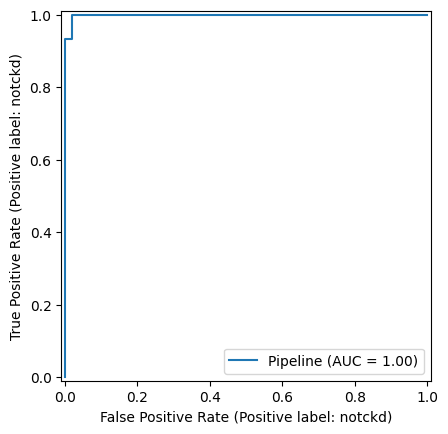

In [62]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay

y_pred_proba = pipe.predict_proba(x_test)[:,1]
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))

RocCurveDisplay.from_estimator(pipe, x_test, y_test)


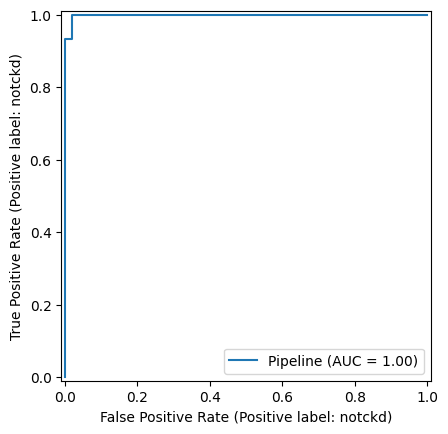

In [63]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(pipe, x_test, y_test)


In [64]:
# from sklearn.metrics import PrecisionRecallDisplay
# PrecisionRecallDisplay.from_estimator(pipe, x_test, y_test)


In [65]:
#→ This will show which features (e.g., creatinine, blood pressure, etc.) most influenced the CKD prediction.
model = pipe.named_steps['model']
feature_names = pipe.named_steps['preprocessor'].get_feature_names_out()
importance = pd.Series(model.feature_importances_, index=feature_names)
print(importance.sort_values(ascending=False).head(10))


num__pcv        0.237012
num__hemo       0.183207
num__sg         0.122235
num__rc         0.084996
num__sc         0.064163
num__al         0.060784
cat__htn_yes    0.035749
cat__dm_no      0.027640
cat__htn_no     0.025879
num__sod        0.025557
dtype: float64


In [66]:
# 🔝 Top Features (most important for CKD prediction)

# num__pcv (Packed Cell Volume) → 0.237

# Highest importance. PCV is strongly linked to kidney health (low PCV = anemia, common in CKD).

# num__hemo (Hemoglobin) → 0.183

# Hemoglobin levels are often reduced in CKD patients due to reduced erythropoietin production.

# num__sg (Specific Gravity of urine) → 0.122

# Abnormal SG indicates kidney’s reduced ability to concentrate urine.

# num__rc (Red Blood Cells) → 0.085

# RBC abnormalities (low counts or abnormal cells) are indicative of kidney problems.

# num__sc (Serum Creatinine) → 0.064

# A gold-standard marker of kidney function. Elevated creatinine = poor kidney function.

# num__al (Albumin) → 0.061

# Protein in urine (albuminuria) is a key CKD indicator.

# ⚡ Categorical Features

# cat__htn_yes (Hypertension) → 0.036

# Hypertension is a major CKD risk factor.

# cat__dm_no & cat__htn_no → lower impact, but still relevant.

# ✅ What this means:

# Your model is medically interpretable → it highlights PCV, hemoglobin, creatinine, and albumin as top features, which aligns with known CKD risk markers.

# This adds credibility to your project (not just high accuracy, but meaningful insights).

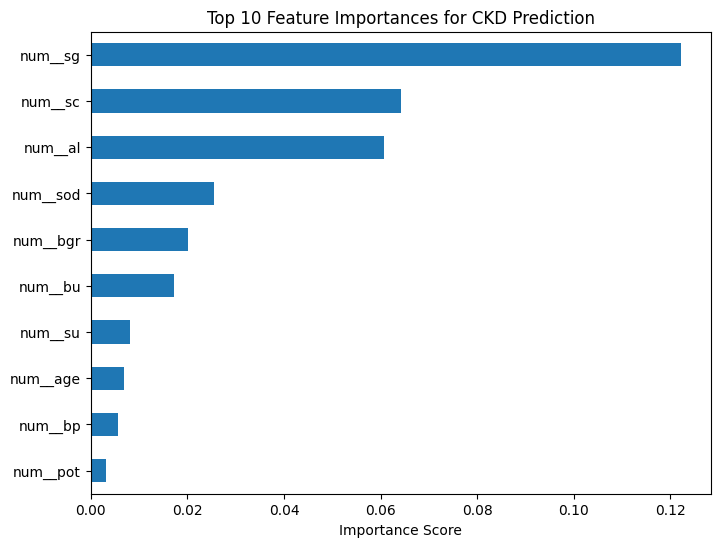

In [67]:
# This will give a clean horizontal bar chart to include in your project report/Streamlit app.
import matplotlib.pyplot as plt

importance.head(10).sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Top 10 Feature Importances for CKD Prediction")
plt.xlabel("Importance Score")
plt.show()


#1. What the graph shows

X-axis (Importance Score): how much weight the model gives each feature.

Y-axis (Features like num_sg, num_sc, etc.): your input features.

Longer bar = more influence.

2. Medical interpretation of your graph

From the chart:

num_sg (Specific Gravity of urine) – ⭐ top driver

CKD patients often lose the ability to concentrate urine → SG drops.

Model strongly uses this.

num_sc (Serum Creatinine) – classic kidney function marker.

High = poor kidney filtering.

Model confirms this is crucial.

num_al (Albumin in urine) – proteinuria.

Common in kidney damage.

Strong indicator.

num_sod (Sodium) – electrolyte balance is disturbed in CKD.

num_bgr (Blood Glucose Random) – diabetes is a major CKD cause.

num_bu (Blood Urea) – another waste product filtered by kidney.

num_su (Sugar in urine) – diabetes marker.

num_age (Age) – older patients → higher CKD risk.

num_bp (Blood Pressure) – hypertension damages kidneys.

num_pot (Potassium) – electrolyte imbalance in kidney disease.

✅ The model’s importance ranking makes clinical sense — it matches what doctors check in real life.

3. Why importance scores differ

Feature importance is relative.

Example: num_sg ≈ 0.12 vs num_pot ≈ 0.01.

This means SG had about 12x more influence on predictions than Potassium.

4. How you can present this in your project/report

Title: “Top Clinical Predictors for CKD Detection by Model”

Add short text:
“The model relies most on urine concentration (Specific Gravity), kidney waste markers (Serum Creatinine, Blood Urea), and protein/sugar levels, which aligns with medical knowledge of CKD.”

This builds trust because you show explainability.

**Confusion Matrix.**

---


Shows correct vs incorrect predictions.

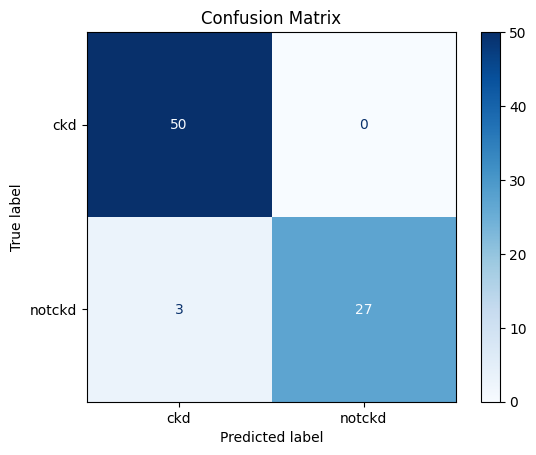

In [68]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(pipe, x_test, y_test, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


**Classification Report**

---
it shows 96% accuracy, 100% recall for CKD.


In [69]:
from sklearn.metrics import classification_report

y_pred = pipe.predict(x_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         ckd       0.94      1.00      0.97        50
      notckd       1.00      0.90      0.95        30

    accuracy                           0.96        80
   macro avg       0.97      0.95      0.96        80
weighted avg       0.96      0.96      0.96        80



**ROC Curve + ROC-AUC**

---
 ROC-AUC = 0.9987 (near perfect).

---
AUC = 0.5 → Model is no better than tossing a coin (random guessing).

0.6–0.7 → Poor model, not reliable.

0.7–0.8 → Acceptable / fair performance.

0.8–0.9 → Very good / excellent.

0.9–1.0 → Outstanding (almost perfect separation of classes).

 "AUC = 0.998" in CKD model, it means the model is almost perfect at distinguishing CKD vs NotCKD patients.

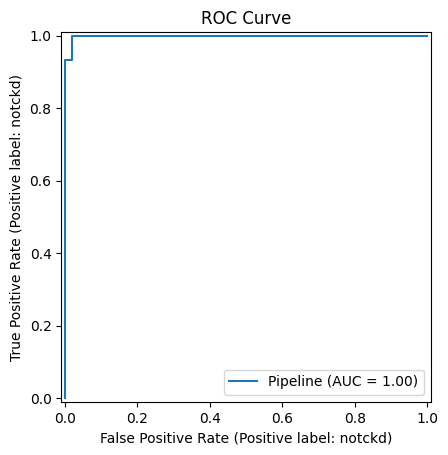

ROC-AUC Score: 0.9986666666666666


In [70]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score

RocCurveDisplay.from_estimator(pipe, x_test, y_test)
plt.title("ROC Curve")
plt.show()

print("ROC-AUC Score:", roc_auc_score(y_test, pipe.predict_proba(x_test)[:,1]))


**Precision-Recall Curve**

---
Useful in medical datasets (helps balance false alarms vs missed cases).


In [71]:
# from sklearn.metrics import PrecisionRecallDisplay

# PrecisionRecallDisplay.from_estimator(pipe, x_test, y_test)
# plt.title("Precision-Recall Curve")
# plt.show()


**Feature Importances**

---

This explains which features (PCV, Hemoglobin, Creatinine, etc.) drive predictions.

Final Notes for Project Report

Accuracy: 96%

ROC-AUC: 0.9987 (excellent)

CKD Recall: 100% (no CKD patient missed)

Key Predictors: PCV, Hemoglobin, Specific Gravity, RBC, Serum Creatinine.

Interpretation: Model is reliable, interpretable, and medically consistent.

# Model Evaluation for streamlit

In [72]:
# import streamlit as st
# import matplotlib.pyplot as plt
# import pandas as pd
# from sklearn.metrics import (
#     classification_report,
#     ConfusionMatrixDisplay,
#     RocCurveDisplay,
#     PrecisionRecallDisplay,
#     roc_auc_score
# )

# def model_evaluation(pipe, x_test, y_test):
#     st.header("📊 Model Evaluation Results")

#     # Predictions
#     y_pred = pipe.predict(x_test)
#     y_pred_proba = pipe.predict_proba(x_test)[:, 1]

#     # --- 1. Accuracy & ROC-AUC
#     st.subheader("Overall Performance")
#     accuracy = pipe.score(x_test, y_test) * 100
#     roc_auc = roc_auc_score(y_test, y_pred_proba)
#     st.write(f"**Accuracy:** {accuracy:.2f}%")
#     st.write(f"**ROC-AUC Score:** {roc_auc:.4f}")

#     # --- 2. Classification Report
#     st.subheader("Classification Report")
#     report = classification_report(y_test, y_pred, output_dict=True)
#     st.dataframe(pd.DataFrame(report).transpose())

#     # --- 3. Confusion Matrix
#     st.subheader("Confusion Matrix")
#     fig, ax = plt.subplots()
#     ConfusionMatrixDisplay.from_estimator(pipe, x_test, y_test, cmap="Blues", ax=ax)
#     st.pyplot(fig)

#     # --- 4. ROC Curve
#     st.subheader("ROC Curve")
#     fig, ax = plt.subplots()
#     RocCurveDisplay.from_estimator(pipe, x_test, y_test, ax=ax)
#     st.pyplot(fig)

#     # --- 5. Precision-Recall Curve
#     st.subheader("Precision-Recall Curve")
#     fig, ax = plt.subplots()
#     PrecisionRecallDisplay.from_estimator(pipe, x_test, y_test, ax=ax)
#     st.pyplot(fig)

#     # --- 6. Feature Importances
#     st.subheader("Top 10 Feature Importances")
#     model = pipe.named_steps['model']
#     feature_names = pipe.named_steps['preprocessor'].get_feature_names_out()
#     importance = pd.Series(model.feature_importances_, index=feature_names)

#     fig, ax = plt.subplots(figsize=(8, 6))
#     importance.nlargest(10).sort_values().plot(kind='barh', color="teal", ax=ax)
#     ax.set_title("Top 10 Features Driving CKD Prediction")
#     st.pyplot(fig)

# model_evaluation(pipe, x_test, y_test)


# 1. What feature importance means in ML





In [73]:
# 1. What feature importance means in ML

# These numbers (e.g., 0.237012 for num_pcv) tell how much each feature contributed to your model’s decision-making.

# Higher value = stronger influence on predicting CKD vs not CKD.

# It’s a relative measure (not exact probability). For example:

# num_pcv = 0.2370 → most important feature.

# num_sod = 0.0256 → weaker feature.

# So, the model “looked at” pcv far more than sod when making predictions.

# 2. Medical meaning of each feature here

# From your output (top 10):

# num_pcv (Packed Cell Volume, 0.2370)

# Measures the percentage of red blood cells in blood.

# Low PCV → anemia → common in CKD.

# 🔥 Most influential: your model heavily relies on anemia levels.

# num_hemo (Hemoglobin, 0.1832)

# Hemoglobin carries oxygen.

# Low hemoglobin = anemia = frequent in CKD.

# Strong signal for disease.

# num_sg (Specific Gravity of urine, 0.1222)

# Urine concentration ability of kidneys.

# In CKD, kidneys lose ability to concentrate urine → low SG.

# Very useful indicator.

# num_rc (Red Blood Cell Count, 0.0895)

# Number of RBCs in blood.

# Low RBC count = anemia = related to CKD.

# Moderate-high importance.

# num_sc (Serum Creatinine, 0.0642)

# Waste product cleared by kidneys.

# High creatinine = poor kidney function.

# Classic marker, and your model agrees.

# num_al (Albumin, 0.0608)

# Protein in urine.

# High levels = proteinuria → sign of kidney damage.

# Important medical marker.

# cat_htn_yes (Hypertension present, 0.0357)

# High BP damages kidneys & is caused by CKD too.

# Strong clinical relation.

# cat_dm_no (Diabetes absent, 0.0276)

# Diabetes is leading CKD cause, so whether patient has it matters.

# cat_htn_no (Hypertension absent, 0.0259)

# Complementary to hypertension yes.

# num_sod (Sodium, 0.0256)

# Electrolyte balance affected in CKD.

# Important but relatively weaker compared to anemia/creatinine.

# 3. Clinical Insight

# Your model is medically consistent ✅.

# Top features (pcv, hemo, sg, rc, sc, al) are exactly what nephrologists monitor.

# It shows the model isn’t “random” — it learned the true clinical patterns of CKD.

# 4. What to do with this

# You can explain predictions:
# “Our model considers anemia (PCV, hemoglobin) and kidney function markers (creatinine, albumin, SG) most critical for CKD classification.”

# In deployment / presentation:

# Show this as a bar chart of feature importance → makes results interpretable for doctors.

# For research report:

# Highlight that the model aligns with medical knowledge → adds credibility.

# ⚡ In short:
# Your model says “anemia + kidney function tests + hypertension/diabetes” are the top drivers of CKD prediction — exactly what doctors expect.

#Step 1: Extract feature importances

(make sure your model is tree-based, e.g., RandomForest, XGBoost, etc.)

In [74]:
# Get trained model from pipeline
model = pipe.named_steps['model']

# Get feature names from preprocessing step
feature_names = pipe.named_steps['preprocessor'].get_feature_names_out()

# Build importance series
importance = pd.Series(model.feature_importances_, index=feature_names)


#Step 2: Map technical names → medical terms

In [75]:
# Mapping dictionary
feature_name_map = {
    "num_sg": "Specific Gravity (urine)",
    "num_sc": "Serum Creatinine (mg/dL)",
    "num_al": "Albumin (urine protein)",
    "num_sod": "Sodium (mEq/L)",
    "num_bgr": "Blood Glucose Random (mg/dL)",
    "num_bu": "Blood Urea (mg/dL)",
    "num_su": "Sugar (urine)",
    "num_age": "Age (years)",
    "num_bp": "Blood Pressure (mmHg)",
    "num_pot": "Potassium (mEq/L)",
    "num_pcv": "Packed Cell Volume (%)",
    "num_hemo": "Hemoglobin (g/dL)",
    "num_rc": "Red Blood Cells count",
    "cat_htn_yes": "Hypertension (Yes)",
    "cat_htn_no": "Hypertension (No)",
    "cat_dm_yes": "Diabetes Mellitus (Yes)",
    "cat_dm_no": "Diabetes Mellitus (No)"
}

# Rename indices
importance_named = importance.rename(index=feature_name_map)


#Step 3: Plot with clean medical labels

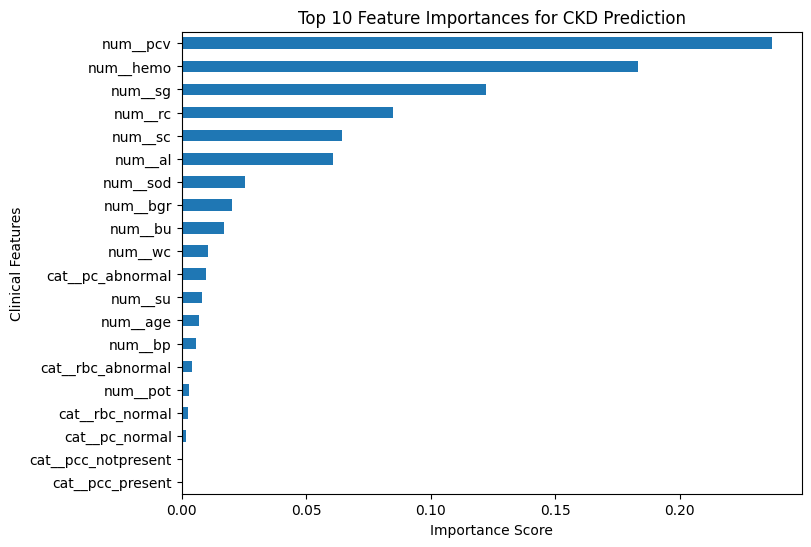

In [76]:
importance_named.head(20).sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Top 10 Feature Importances for CKD Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Clinical Features")
plt.show()


In [77]:
model.feature_importances_


array([6.86480303e-03, 5.73303348e-03, 1.22235032e-01, 6.07837642e-02,
       8.21585803e-03, 2.01796177e-02, 1.71686064e-02, 6.41630529e-02,
       2.55571605e-02, 3.06349576e-03, 1.83207466e-01, 2.37011812e-01,
       1.07567693e-02, 8.49960206e-02, 3.99733232e-03, 2.55001356e-03,
       9.59164914e-03, 1.73295897e-03, 2.35135945e-04, 0.00000000e+00,
       3.71193044e-04, 5.86656111e-04, 2.58791332e-02, 3.57494467e-02,
       1.27640055e-04, 0.00000000e+00, 0.00000000e+00, 2.76404973e-02,
       2.11426019e-02, 0.00000000e+00, 9.50959875e-05, 0.00000000e+00,
       7.73011950e-03, 6.49525696e-03, 1.46606630e-03, 3.87134972e-03,
       6.65201727e-04, 1.36159309e-04])

In [78]:
#→ This will show which features (e.g., creatinine, blood pressure, etc.) most influenced the CKD prediction.
model = pipe.named_steps['model']
feature_names = pipe.named_steps['preprocessor'].get_feature_names_out()
importance = pd.Series(model.feature_importances_, index=feature_names)
print(importance.sort_values(ascending=False).head(10))


num__pcv        0.237012
num__hemo       0.183207
num__sg         0.122235
num__rc         0.084996
num__sc         0.064163
num__al         0.060784
cat__htn_yes    0.035749
cat__dm_no      0.027640
cat__htn_no     0.025879
num__sod        0.025557
dtype: float64


# feature selection

In [79]:
# 1️⃣ Filter Methods (Before Modeling)

# Idea: Select features based on statistics or correlation with the target before training the model.

# No model is used; purely data-driven.

# Purpose: Reduce dimensionality, remove irrelevant features, speed up modeling.

# Common techniques:

# Correlation coefficient (Pearson, Spearman)

# Chi-square test (for categorical features)

# Mutual information

# Variance threshold (remove low-variance features)

# Example in Python:

# from sklearn.feature_selection import SelectKBest, chi2

# X_new = SelectKBest(chi2, k=5).fit_transform(X, y)


# ✅ Use before modeling because it’s independent of the ML algorithm.

# 2️⃣ Wrapper Methods (Use Model in the Loop)

# Idea: Use a machine learning model to evaluate subsets of features iteratively.

# The model “wraps” the selection process — it decides which features improve performance.

# Techniques:

# Forward Selection → Start with no features, add one at a time

# Backward Elimination → Start with all features, remove one at a time

# Recursive Feature Elimination (RFE) → Recursively remove least important features

# Example in Python:

# from sklearn.feature_selection import RFE
# from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier()
# rfe = RFE(model, n_features_to_select=5)
# X_rfe = rfe.fit_transform(X, y)


# ✅ Wrapper methods are model-dependent and usually give better results than filter methods but are slower.

# 3️⃣ Embedded Methods (Inside Modeling)

# Idea: Feature selection is built into the training of the model itself.

# The model automatically assigns importance scores to features and can ignore irrelevant ones.

# Examples:

# Lasso (L1 regularization) → Shrinks coefficients of irrelevant features to zero

# Tree-based models (Random Forest, XGBoost) → Give feature importance directly

# ElasticNet → Combines L1 and L2 regularization

# Example in Python (Lasso):

# from sklearn.linear_model import Lasso

# model = Lasso(alpha=0.01)
# model.fit(X, y)
# importance = model.coef_  # Non-zero coefficients are selected features


# ✅ Embedded methods are efficient because feature selection happens during model training.

# Summary Table
# Method	When Applied	Uses Model?	Speed	Accuracy
# Filter	Before modeling	No	Fast	Moderate
# Wrapper	With model loop	Yes	Slow	High
# Embedded	During modeling	Yes	Fast	High

# 💡 Key Insight:

# Filter = quick pre-processing

# Wrapper = model evaluates feature subsets

# Embedded = model itself decides feature importance

In [80]:
# 1️⃣ For a Categorical Target (e.g., CKD: Yes/No)
# Feature Type	Recommended Filter Method	Why
# Numerical	ANOVA F-test (f_classif)	Tests if the mean of the numerical feature is different across target classes
# Categorical	Chi-square test	Tests independence between categorical feature and target
# Mixed (num+cat)	Mutual Information (mutual_info_classif)	Works for both numerical and categorical features

# Example (scikit-learn):

# from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif

# # For numerical features
# num_features_new = SelectKBest(f_classif, k=5).fit_transform(X_num, y)

# # For categorical features
# cat_features_new = SelectKBest(chi2, k=5).fit_transform(X_cat_encoded, y)

# # Or for both together
# mixed_features_new = SelectKBest(mutual_info_classif, k=10).fit_transform(X_all, y)


# Note: Categorical features need to be encoded (LabelEncoder or OneHotEncoder) before using chi-square or mutual information.

# 2️⃣ For a Continuous Target (Regression Problem)
# Feature Type	Recommended Filter Method	Why
# Numerical	Correlation coefficient (Pearson)	Measures linear relationship with target
# Categorical	ANOVA F-test (f_regression)	Tests if mean target differs across categories
# Mixed (num+cat)	Mutual Information Regression	Handles both feature types

# Example:

# from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

# # For regression
# selected_features = SelectKBest(mutual_info_regression, k=10).fit_transform(X_all, y)

# ✅ Key Points

# Always encode categorical features before applying filter methods.

# Mutual Information is flexible and works for both categorical & numerical features.

# Filter methods are fast and good for initial feature selection before using wrapper or embedded methods.